<a href="https://colab.research.google.com/github/DenisePotenza/Portfolio-DS/blob/master/Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQBXnNfMfZwzW0c17cqlxwp2OPlNTYo6WSdZ_EKjpq1chnlOB4KA)

# Classify Forest Types Competition

[Learn with other kaggle users competition](https://www.kaggle.com/c/learn-together/overview)!!

## About the forest!!!

**The Roosevelt Forest is located in north central Colorado. It is contiguous with the Colorado State Forest as well as the Arapho National Forest and the Routt National Forest. The forest is administred from offices in Fort Collins, and denoted by the United States Forest Service.
The Forest has a total area of 813.799 acres, divided in 6 areas. Our dataset counts with only four types.** 
- **Rawah Wilderness Area:**
    *It encompasses 76.394 acres, and include 25 named lakes. There are 85 miles of trails in the area and elevation ranges from 8.400 feet to 13.000 feet. The temperature ranges from 5 degrees Fahrenheit during the winter and a hight of 77 degrees Fahrenheit during the sumer.*
    
- **Neota Wilderness Area:**
    *It encompasses 9.924 acres and is bordered on the south by Rocky Mountain National Park. Elevation ranges from 10.000 feet to 11.896 feet. There are only 1.5 miles of trails in this area.*
    
- **Comanche Peak Wilderness Area:**
    *The 66,791-acre (27,029 ha) wilderness named for its most prominent peak was established in 1980. There are 121 miles (195 km) of hiking trails inside the wilderness. Roosevelt National Forest and Rocky Mountain National Park officially maintain 19 trails within the Wilderness, 5 of which pass into Rocky Mountain National Park. There are also 7 named peaks, 6 named lakes (including Comanche Reservoir) and 16 named rivers and creeks within the wilderness boundaries. *
    
- **Cache la Poudre Wilderness Area:**
    *This wilderness covers 9,258 acres (37.47 km2) and is characterized by steep, rugged terrain along the Cache la Poudre River. Elevations in this area varies from 6,200 feet (1,900 m) to 8,600 feet (2,600 m). Only one trail, the Mount McConnel National Recreation Trail that is 3 miles (4.8 km) long, exists in this wilderness, and 9 miles (14 km) of the Little South Fork of the Cache La Poudre River flow through the wilderness.* 
    

**The goal here is to build a model able to classify the forest type based on information about the area! The study includes four wilderness areas located in Roosevelt National Forest of northern Colorado.<br>
The dataset comes from a study conducted in the areas within the Roosevelt National Forest. These areas represent forests with very little human disturbances - the existing forest cover types there are more a result of ecological processes rather than forest management practices.**

## The Data!!!

**The dataset is available on [Kaggle](https://www.kaggle.com/c/learn-together/data).** <br>
- Train dataset (train.csv):
    - It must be used to construct and train the Machine Learning model. In this dataset, there is the cover type of any tree.
    - Composed of several features as, soil type and wilderness area.
- Test dataset(test.cvs):
    - It must be used as data that has never been seen by the model. Here it doesn't have the cover type of each tree.
    
    
<br>
<br>
Let's start importing some libraries and import the data to this notebook.

In [0]:
#Basic libraries
import numpy as np
import pandas as pd

#Shows all columns in the dataset
pd.options.display.max_columns=None


#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

#Machine Learning and metrics libraries 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import compute_sample_weight

In [0]:
#Importing train and test dataset
train = pd.read_csv('https://raw.githubusercontent.com/DenisePotenza/Portfolio-DS/master/Datasets/TREES-train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/DenisePotenza/Portfolio-DS/master/Datasets/TREES-test.csv')

In [0]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


**Let's see the number of lines and columns in the dataset.**

In [0]:
print('Train dataset:\nLines:\t\t{}\nColumns:\t{}\n'. format(train.shape[0], train.shape[1]))
print('Test dataset:\nLines:\t\t{}\nColumns:\t{}\n'. format(test.shape[0], test.shape[1]))

Train dataset:
Lines:		15120
Columns:	56

Test dataset:
Lines:		565892
Columns:	55



## Data Exploration

**As an initial exploration, there is some information about the variables in the dataset.<br>
This is a Supervised Learning, so our target here is the variable Cover Type.**

##### Data Dictionary

* **Elevation:** Elevation in meters <br>
* **Aspect:** Aspect in degrees azimuth <br>
* **Slope:** Slope in degrees <br>
* **Horizontal_Distance_To_Hydrology:** Horizontaal Distsance to nearest surface water features <br>
* **Vertical_Distance_To_Hydrology:** Vertical Distance to nearest surface water features<br>
* **Horizontal_Distance_To_Roadways:** Horizontal Distance to nearest roadway <br>
* **Hillshade_9am (0 to 255 index):** Hillshade index at 9am, summer solstice <br>
* **Hillshade_Noon (0 to 255 index):** Hillshade index at noon, summer solstice <br>
* **Hillshade_3pm (0 to 255 index):** Hillshade index at 3pm, summer solstice <br>
* **Horizontal_Distance_To_Fire_Points:** Horizontal Distance to nearest wildfire ignition points <br>
* **Wilderness_Area (4 binary columns, 0 = absence or 1 = presence):** Wilderness area designation <br>
* **Soil_Type (40 binary columns, 0 = absence or 1 = presence):** Soil Type designation <br>
* **Cover_Type (7 types, integers 1 to 7):** Forest Cover Type designation <br>

#### The Data Types
* Numerical
    * Quantitative
        * Elevation                               
        * Aspect                                  
        * Slope                                   
        * Horizontal_Distance_To_Hydrology        
        * Vertical_Distance_To_Hydrology          
        * Horizontal_Distance_To_Roadways         
        * Hillshade_9am                           
        * Hillshade_Noon                          
        * Hillshade_3pm                           
        * Horizontal_Distance_To_Fire_Points      
    * Qualitative
        * Wilderness_Area 
        * Soil_Type 
    * Target
        * Cover_Type 


In [0]:
#show the variable types
train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

### Statistical Information about the dataset
Let's check some statistical information about this dataset.

In [0]:
#Shows some statistical information about the dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


## Data preparation

First of all, let's create a copy of the original data and merge all the soil types in one column.


In [0]:
train_copy = train.copy()

In [0]:
train_copy.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [0]:
#Merging the wilderness areas columns and the soil type columns in one column
train_copy['Wilderness_Areas'] = sum(i * train_copy['Wilderness_Area{}'.format(i)] for i in range(1, 5))
train_copy['Soil_Type'] = sum(i * train_copy['Soil_Type{}'.format(i)] for i in range(1, 41))

#Drop the soil type columns
train_copy.drop(['Id', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],axis=1, inplace=True)

train_copy.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Wilderness_Areas,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,2,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,2,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,1,29


* **First graphic** - Elevation per Cover Type. Only cover types 3, 4 and 6 have trees under 2000 meters of elevation, 4 and 5 have the smallest variation.
* **Second graphic** - Aspect per Cover Type. Here we can see that all cover types have no difference related to aspect.
* **Third graphic** - Slope per Cover Type. In this graphic, there is very few difference between the cover types related to the slope.

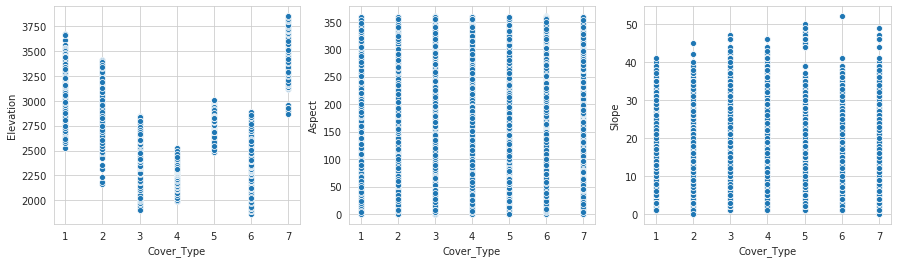

In [0]:
fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,4))
sns.scatterplot(x='Cover_Type', y='Elevation', data=train_copy, ax=axis1)
sns.scatterplot(x='Cover_Type', y='Aspect', data=train_copy, ax=axis2)
sns.scatterplot(x='Cover_Type', y='Slope', data=train_copy, ax=axis3);

* **First graphic** - Horizontal Distance to Hydrology per Cover Type. Only cover types 2 and 7 have trees above 1200 distant from water, the 3, 4 and 6 are all trees under 800 distant from water.
* **Second graphic** - Vertical Distance to Hydrology per Cover Type. The cover type 2 has a few trees over 500 distant from water, the 2, 3 and 5 have trees under -100 distance from water.
* **Third graphic** - Horizontal Distance to Roadways per Cover Type. The cover type 4 only has trees under 2000 distance from roadways. The cover type 5 has a gap between 3500 and 4500 distance from the roadway.
* **Fourth graphic** - Horizontal Distance to Fire Points per Cover Type. Here the cover type 4 also is the only one under 2000 distance from fire points. The cover type 5 here also has a gap between the 3500 and 5000 distance to fire points.

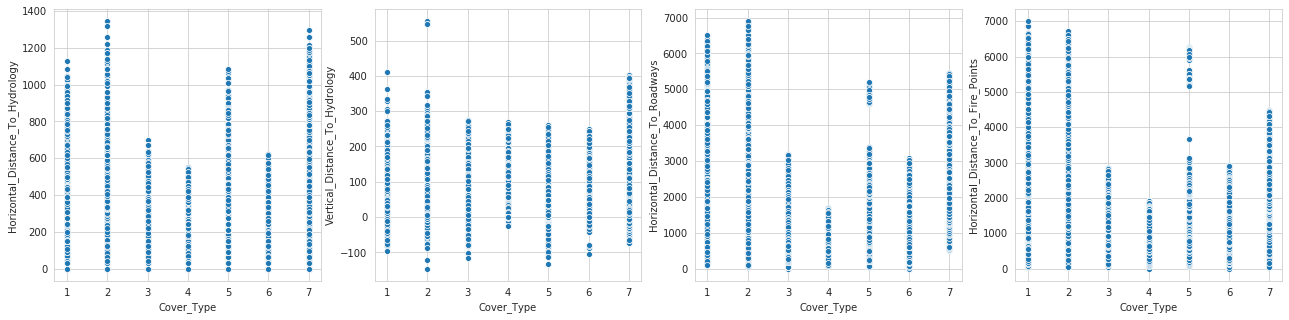

In [0]:
fig,(axis1,axis2,axis3, axis4) = plt.subplots(1,4,figsize=(22,5))
sns.scatterplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data=train_copy, ax=axis1)
sns.scatterplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', data=train_copy, ax=axis2)
sns.scatterplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways', data=train_copy, ax=axis3)
sns.scatterplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', data=train_copy, ax=axis4);

* **First graphic** - Hillshade 9am per Cover Type. The cover type 6 is the only one that has 1 point at 0, would be an outlier?
* **Second graphic** - Hillshade Noon per Cover Type. Cover type 5 and 7 have points under 120, cover type 2 has only 1 point.
* **Third graphic** - Hillshade 3pm per Cover Type. It seems to be a balanced graphic.

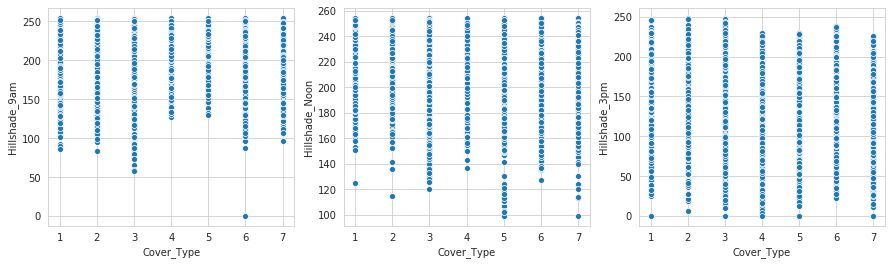

In [0]:
fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,4))
sns.scatterplot(x='Cover_Type', y='Hillshade_9am', data=train_copy, ax=axis1)
sns.scatterplot(x='Cover_Type', y='Hillshade_Noon', data=train_copy, ax=axis2)
sns.scatterplot(x='Cover_Type', y='Hillshade_3pm', data=train_copy, ax=axis3);

**Q:** Wich soil types are in each Cover Type?

In [0]:
cover=pd.get_dummies(train_copy['Cover_Type'])
train_copy = pd.concat(objs=[train_copy, cover], axis=1)
train_copy=train_copy.rename(columns={1:'Cover_Type1', 2:'Cover_Type2', 3:'Cover_Type3',4:'Cover_Type4', 5:'Cover_Type5',
                          6:'Cover_Type6', 7:'Cover_Type7'})

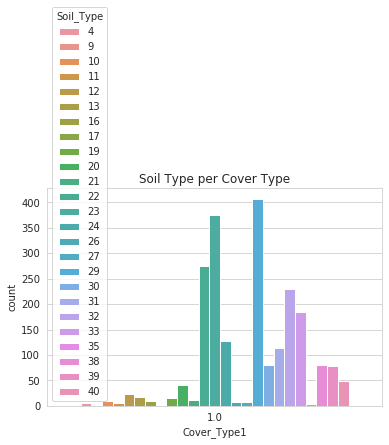

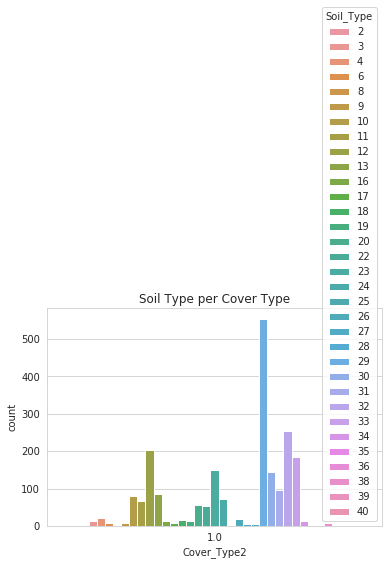

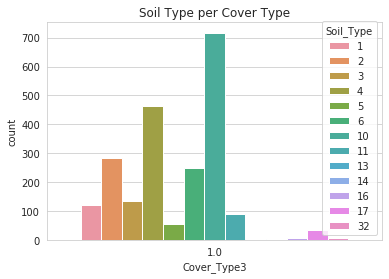

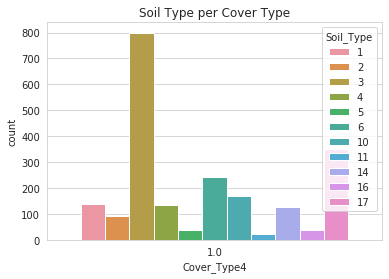

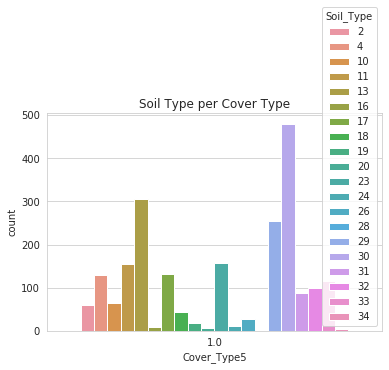

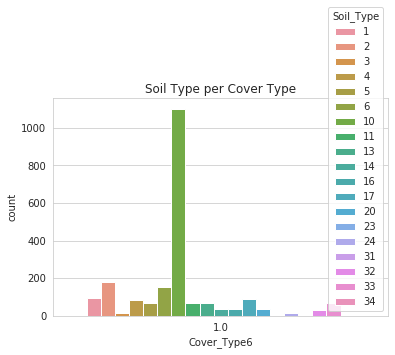

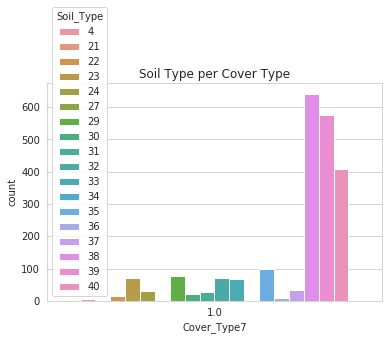

In [0]:
cover1 = train_copy.replace(0, np.nan)
cover2 = train_copy.replace(0, np.nan)
cover3 = train_copy.replace(0, np.nan)
cover4 = train_copy.replace(0, np.nan)
cover5 = train_copy.replace(0, np.nan)
cover6 = train_copy.replace(0, np.nan)
cover7 = train_copy.replace(0, np.nan)
cover1.dropna(subset=['Cover_Type1'], inplace=True)
cover2.dropna(subset=['Cover_Type2'], inplace=True)
cover3.dropna(subset=['Cover_Type3'], inplace=True)
cover4.dropna(subset=['Cover_Type4'], inplace=True)
cover5.dropna(subset=['Cover_Type5'], inplace=True)
cover6.dropna(subset=['Cover_Type6'], inplace=True)
cover7.dropna(subset=['Cover_Type7'], inplace=True)


plt.title('Soil Type per Cover Type')
sns.countplot(x='Cover_Type1', data=cover1, hue='Soil_Type')
plt.show()
plt.title('Soil Type per Cover Type')
sns.countplot(x='Cover_Type2', data=cover2, hue='Soil_Type')
plt.show()
plt.title('Soil Type per Cover Type')
sns.countplot(x='Cover_Type3', data=cover3, hue='Soil_Type')
plt.show()
plt.title('Soil Type per Cover Type')
sns.countplot(x='Cover_Type4', data=cover4, hue='Soil_Type')
plt.show()
plt.title('Soil Type per Cover Type')
sns.countplot(x='Cover_Type5', data=cover5, hue='Soil_Type')
plt.show()
plt.title('Soil Type per Cover Type')
sns.countplot(x='Cover_Type6', data=cover6, hue='Soil_Type')
plt.show()
plt.title('Soil Type per Cover Type')
sns.countplot(x='Cover_Type7', data=cover7, hue='Soil_Type')
plt.show()

**Q:** What is the amount of each Cover Type?

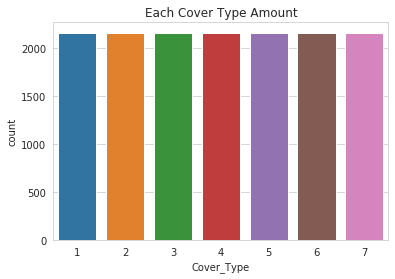

In [0]:
plt.title('Each Cover Type Amount')
sns.countplot(x='Cover_Type', data=train_copy);

**Q:** How many soil types are in each Wilderness Area?

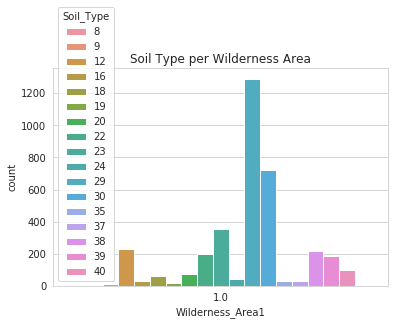

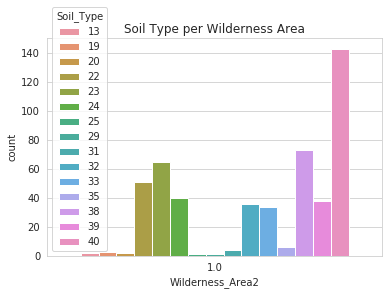

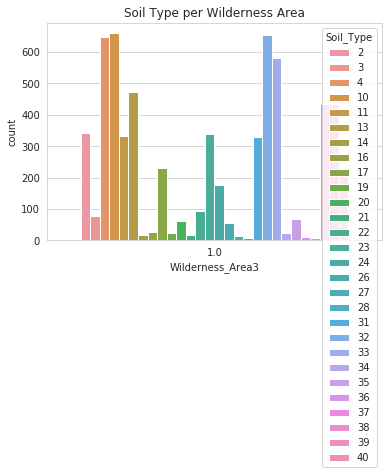

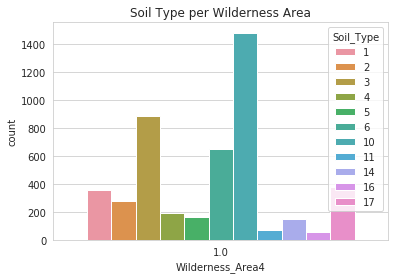

In [0]:
wilderness1 = train_copy.replace(0, np.nan)
wilderness2 = train_copy.replace(0, np.nan)
wilderness3 = train_copy.replace(0, np.nan)
wilderness4 = train_copy.replace(0, np.nan)
wilderness1.dropna(subset=['Wilderness_Area1'], inplace=True)
wilderness2.dropna(subset=['Wilderness_Area2'], inplace=True)
wilderness3.dropna(subset=['Wilderness_Area3'], inplace=True)
wilderness4.dropna(subset=['Wilderness_Area4'], inplace=True)


plt.title('Soil Type per Wilderness Area')
sns.countplot(x='Wilderness_Area1', data=wilderness1, hue='Soil_Type')
plt.show()
plt.title('Soil Type per Wilderness Area')
sns.countplot(x='Wilderness_Area2', data=wilderness2, hue='Soil_Type')
plt.show()
plt.title('Soil Type per Wilderness Area')
sns.countplot(x='Wilderness_Area3', data=wilderness3, hue='Soil_Type')
plt.show()
plt.title('Soil Type per Wilderness Area')
sns.countplot(x='Wilderness_Area4', data=wilderness4, hue='Soil_Type')
plt.show()

**Q:** What is the amount of each Wilderness Area?

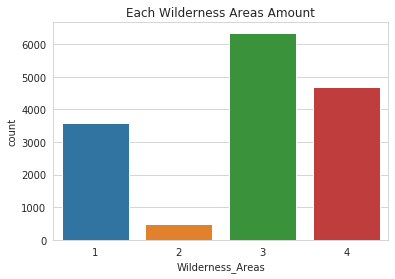

In [0]:
plt.title('Each Wilderness Areas Amount')
sns.countplot(x='Wilderness_Areas', data=train_copy);

As we already know soil type 7 and 15 has constant value 0, and what about the others?

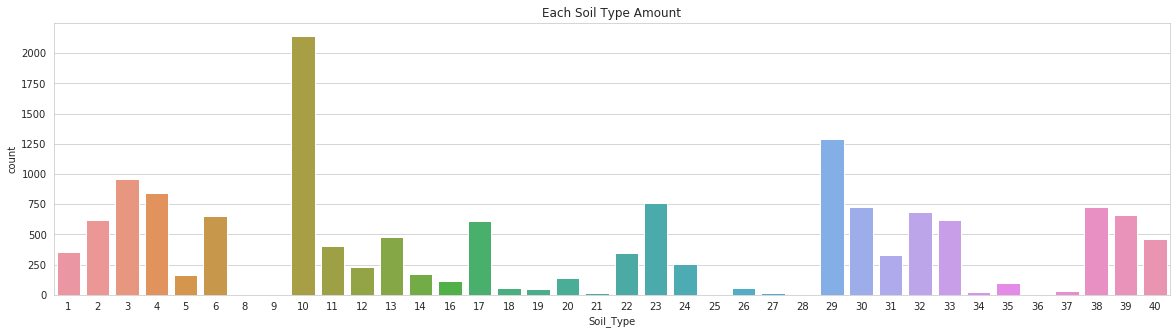

In [0]:
plt.figure(figsize=(20,5))
plt.title('Each Soil Type Amount')
sns.countplot(x='Soil_Type', data=train_copy);

**Q:** What is the amount of wilderness areas per cover type?

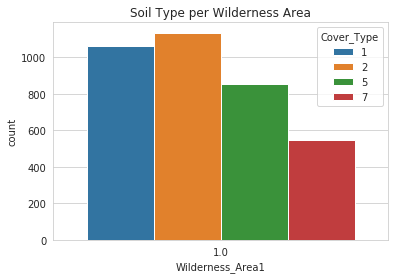

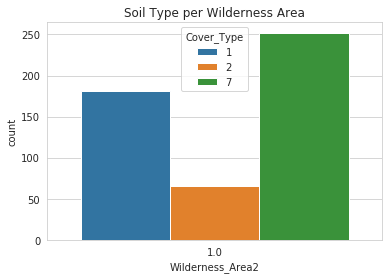

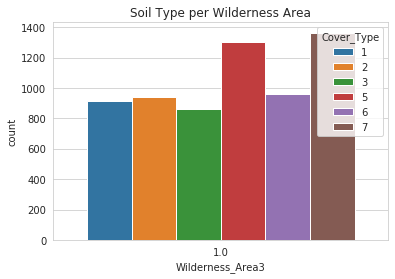

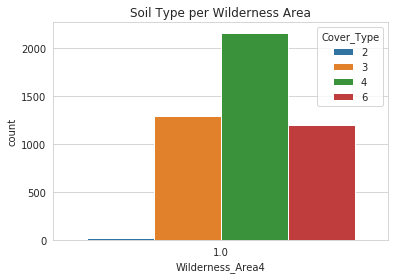

In [0]:
plt.title('Soil Type per Wilderness Area')
sns.countplot(x='Wilderness_Area1', data=wilderness1, hue='Cover_Type')
plt.show()
plt.title('Soil Type per Wilderness Area')
sns.countplot(x='Wilderness_Area2', data=wilderness2, hue='Cover_Type')
plt.show()
plt.title('Soil Type per Wilderness Area')
sns.countplot(x='Wilderness_Area3', data=wilderness3, hue='Cover_Type')
plt.show()
plt.title('Soil Type per Wilderness Area')
sns.countplot(x='Wilderness_Area4', data=wilderness4, hue='Cover_Type')
plt.show()

**This dataset has many features, so to make easier to understand the correlation between them and our target, it will be divided into 3.**

**Features on the first part:**
* Elevation
* Aspect
* Slope
* Horizontal Distance to Hydrology
* Vertical Distance to Hydrology
* Horizontal Distance to Roadways
* Hillshade 9am, Hillshade Noon
* Hillshade 3pm
* Horizontal Distance To Fire Points
* Wilderness Area 1
* Wilderness Area 2
* Wilderness Area 3 
* Wilderness Area 4
* Cover Type

**Features on the second part:**
* Soil Type 1 to 20
* Cover Type

**Features on the third part:**
* Soil Type 21 to 40
* Cover Type

Part 2 and 3 show us that the soil types influence very little to predict the cover type.

In [0]:
train_part1 = train[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Cover_Type']]

train_part2 = train[['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',       
       'Cover_Type']]

train_part3 = train[['Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40','Cover_Type']]

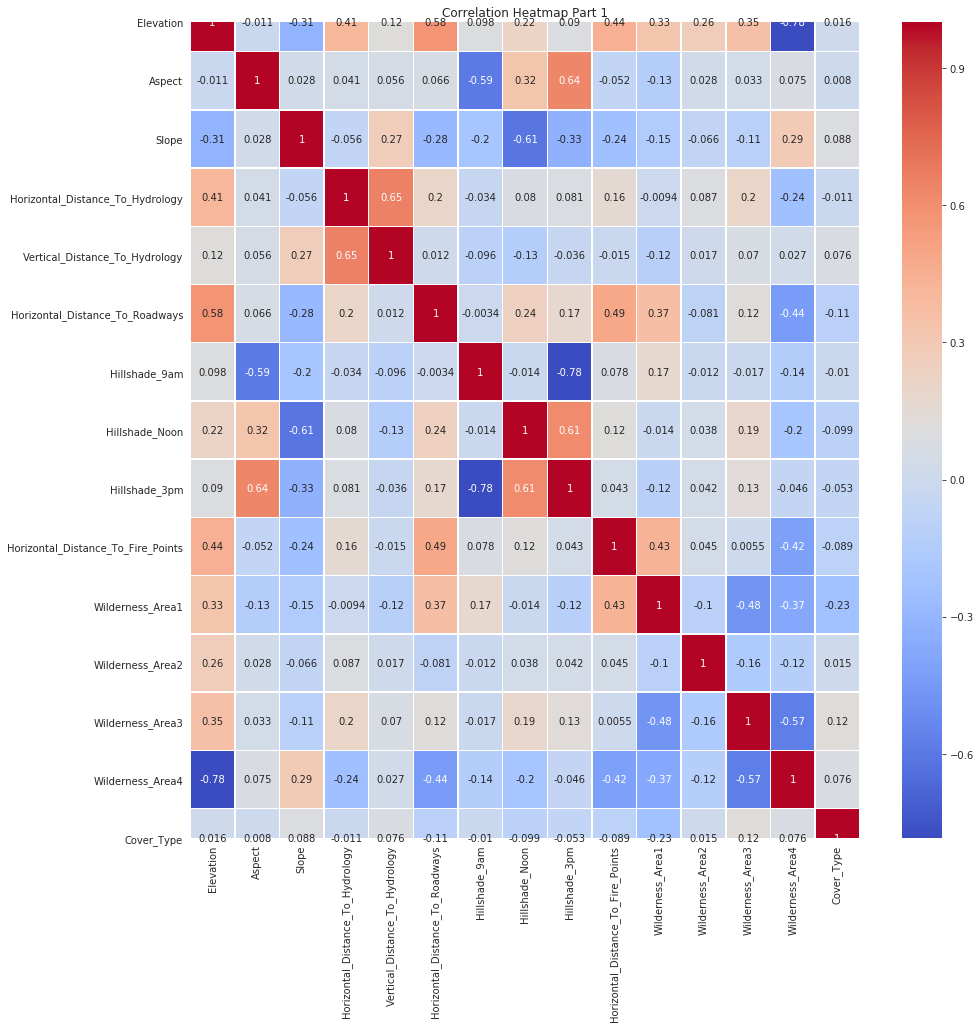

In [0]:
plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap Part 1')
sns.heatmap(train_part1.corr(), annot=True, cmap='coolwarm', linewidths=0.5);

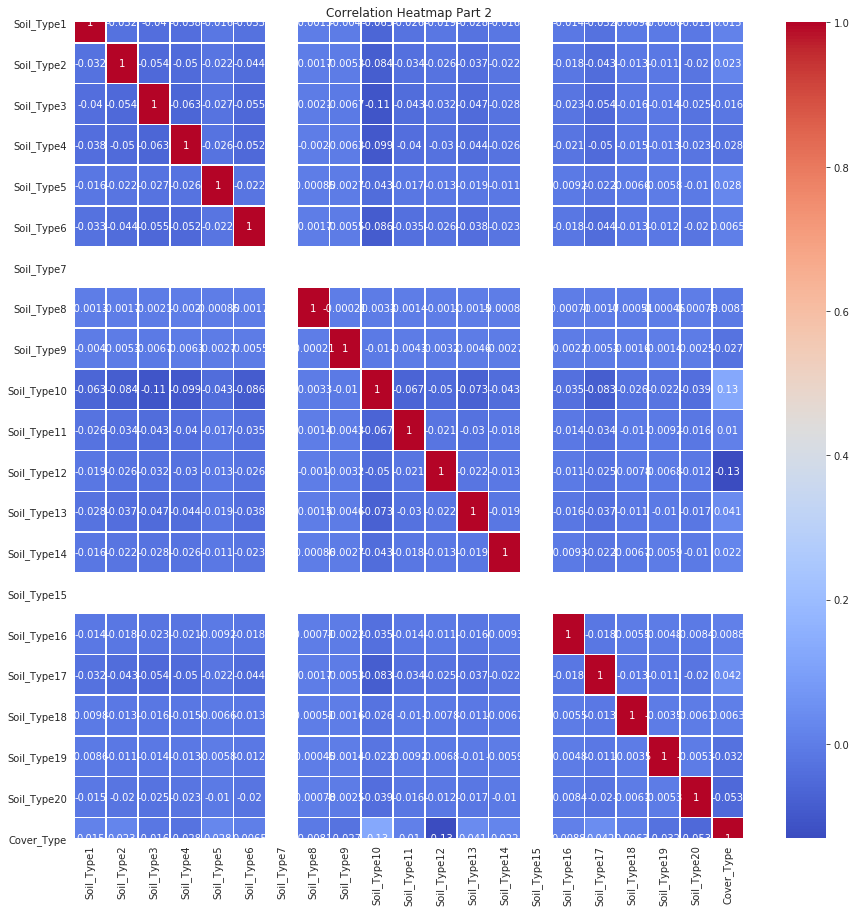

In [0]:
plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap Part 2')
sns.heatmap(train_part2.corr(), annot=True, cmap='coolwarm', linewidths=0.5);

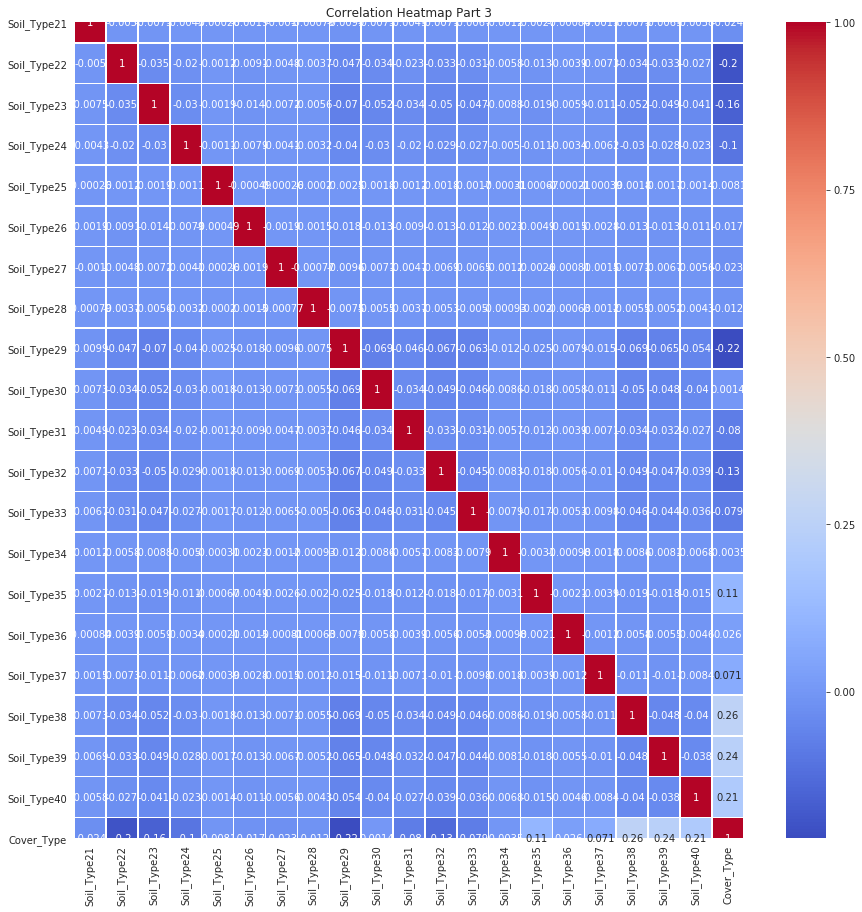

In [0]:
plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap Part 3')
sns.heatmap(train_part3.corr(), annot=True, cmap='coolwarm', linewidths=0.5);

In this model, will be adding some new features and drop other ones. To avoid the difference between train and test dataset, they will be joined in only one data frame.

In [0]:
#Saving the index for later recovery
train_id = train.shape[0]
test_id = test.shape[0]

#Saving id for kaggle's submission
index = test['Id']

#Extract and delete the Cover Type column from the train dataset
target = train['Cover_Type'].copy()
train.drop('Cover_Type', axis=1, inplace=True)

#Concatenate both datasets in one DataFrame
df_trees = pd.concat(objs=[train,test], axis=0).reset_index(drop=True)

print('df_trees:\nLines:\t\t{}\nColumns:\t{}'.format(df_trees.shape[0], df_trees.shape[1]))

df_trees:
Lines:		581012
Columns:	55


#### Adding new features

This dataset has several numerical features. We can use this to create new features. It can help to increase the machine learning accuracy.<br>
* Wilderness_Areas are all the wilderness area columns combined in one column.
* Soil_Type are all the soil_type columns combined in one column.
* Hydro_Elevation_diff, Hydro_Fire_diff, Hydro_Road_diff, and Road_Fire_diff, calculates the difference between water, fire and road, represent the minimum possible horizontal distance between them.
* Hydro_Fire_sum, Hydro_Road_sum and Road_Fire_sum, calculates the sum between water, fire and road, represents the maximum horizontal distance between them. 
* Hydro_Euclidean is the Euclidean distance is the straight-line distance between the patch and the and the closest water source, given the horizontal and vertical distance between them.
* Hydro_Elevation_diff is the difference between patch elevation and vertical distance to water is a rough measure of the elevation of the water source itself.
* Stoneyness adds the information given in the soil type description
    * 1 - Rubbly
    * 2 - Stony
    * 3 - Very Stony
    * 4 - Extremely Stony
    * 0 - Has no definition

In [0]:
#Difference between column Elevation and column Vertical Distance to Hydrology
df_trees['Hydro_Elevation_diff'] = df_trees[['Elevation','Vertical_Distance_To_Hydrology']].diff(axis='columns').iloc[:, [1]]

#Euclidean square root between column Horizontal Distance to Hydrology and column Vertical Distance To Hidrology sum
df_trees['Hydro_Euclidean'] = np.sqrt(df_trees['Horizontal_Distance_To_Hydrology']**2 + 
                                      df_trees['Vertical_Distance_To_Hydrology']**2)

#Sum between column Horizontal Distance to Hydrology and Horizontal Distance to Fire Points
df_trees['Hydro_Fire_sum'] = df_trees[['Horizontal_Distance_To_Hydrology',
                             'Horizontal_Distance_To_Fire_Points']].sum(axis='columns')

#Difference between column Horizontal Distance to Hydrology and column Horizontal Distance to Fire Points
df_trees['Hydro_Fire_diff'] = df_trees[['Horizontal_Distance_To_Hydrology',
                              'Horizontal_Distance_To_Fire_Points']].diff(axis='columns').iloc[:, [1]].abs()

#Sum between colum Horizontal Distance to Hydrology and Horizontal Distance to Roadways
df_trees['Hydro_Road_sum'] = df_trees[['Horizontal_Distance_To_Hydrology',
                             'Horizontal_Distance_To_Roadways']].sum(axis='columns')

#Difference between column Horizontal Distance do Hydrology and column Horizontal Distance to Roadways
df_trees['Hydro_Road_diff'] = df_trees[['Horizontal_Distance_To_Hydrology',
                              'Horizontal_Distance_To_Roadways']].diff(axis='columns').iloc[:, [1]].abs()

#Sum between column Horizontal Distance to Roadways and column Horizontal Distance to Fire Points
df_trees['Road_Fire_sum'] = df_trees[['Horizontal_Distance_To_Roadways',
                            'Horizontal_Distance_To_Fire_Points']].sum(axis='columns')

#Difference between column Horizontal Distance to Roadways and column y
df_trees['Road_Fire_diff'] = df_trees[['Horizontal_Distance_To_Roadways',
                             'Horizontal_Distance_To_Fire_Points']].diff(axis='columns').iloc[:, [1]].abs()

df_trees['Mean_Amenities']=(df_trees.Horizontal_Distance_To_Fire_Points + 
                            df_trees.Horizontal_Distance_To_Hydrology + 
                            df_trees.Horizontal_Distance_To_Roadways) / 3 

df_trees['Mean_Fire_Hyd']=(df_trees.Horizontal_Distance_To_Fire_Points + df_trees.Horizontal_Distance_To_Hydrology) / 2 
    
# Compute Soil_Type number from Soil_Type binary columns
df_trees['Stoneyness'] = sum(i * df_trees['Soil_Type{}'.format(i)] for i in range(1, 41))
    
# For all 40 Soil_Types, 1=rubbly, 2=stony, 3=very stony, 4=extremely stony, 0=?
stoneyness = [4, 3, 1, 1, 1, 2, 0, 0, 3, 1, 
              1, 2, 1, 0, 0, 0, 0, 3, 0, 0, 
              0, 4, 0, 4, 4, 3, 4, 4, 4, 4, 
              4, 4, 4, 4, 1, 4, 4, 4, 4, 4]
    
# Replace Soil_Type number with "stoneyness" value
df_trees['Stoneyness'] = df_trees['Stoneyness'].replace(range(1, 41), stoneyness)

#### Dropping Features 
The Id column and Soil Type are going to be deleted.

In [0]:
df_trees.drop(['Id', 'Soil_Type7', 'Soil_Type8','Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17',  'Soil_Type19', 'Soil_Type20','Soil_Type21', 'Soil_Type23'],axis=1, inplace=True)

#### Split the dataframe in train and test original dataset
Now that all the features are done, the dataframe that was created must be split in the train and test dataset, with the same shape that it has before.

In [0]:
train = df_trees.iloc[:train_id]
test = df_trees.iloc[train_id:]

#### The first 
For commom sense it's used a variable called 'X' to create a dataset holding all the predictive features, and another variable called 'y' containing only the variable target, in this case, the Cover_Type column. 

In [0]:
sc=StandardScaler()

In [0]:
train_st = train.copy()

In [0]:
scaling_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

train_st[scaling_cols] = sc.fit_transform(train_st[scaling_cols])

In [0]:
X=train_st
y=target

## Trainning the first model

In the train dataset, the cover types have all the same sample numbers, but in the test dataset, it's not true. To help to increase the accuracy, the first model also will help to get the weight of each cover type, this will be used to tune our model ahead.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, random_state=42)

forest_model = ExtraTreesClassifier(n_estimators = 2000, max_depth=30)

forest_model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=30, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=2000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
pred = forest_model.predict(X_test)

In [0]:
accuracy_score(y_test, pred)

0.8585600907029478

In [0]:
forest_pred= forest_model.predict(test)

In [0]:
unique,counts = np.unique(forest_pred, return_counts=True)
values = np.asarray((unique, counts)).T
total = values.sum()
weight = {}
for v in values:
    weight[v[0]] = v[1] / total

weight

{1: 0.5495175996607294,
 2: 0.2582290783149562,
 3: 0.08748586372632174,
 4: 0.0006149279050042408,
 5: 0.004793963811139384,
 6: 0.0033343935538592026,
 7: 0.09597469607011591}

#### Finding the best params
Now its time to tune our model, we'll keep using ExtraTreesClassifier. This model has several parameters and can be configured in many different ways. To find the best parameters its's gonna be used the GridSearchCV, a module from sklearn library. It receives many different values to each parameter and tests it to find which set has the best result.

In [0]:
model = ExtraTreesClassifier()
n_estimators = [350,400]
max_depth = [30,25]
sample_weight=compute_sample_weight(weight, y)

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy",n_jobs=4, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y, sample_weight=sample_weight)
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with %r:' %(mean, stdev, param))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  3.9min finished


Best: 0.903638 using {'max_depth': 30, 'n_estimators': 400}
0.903241 (0.005510) with {'max_depth': 30, 'n_estimators': 350}:
0.903638 (0.006076) with {'max_depth': 30, 'n_estimators': 400}:
0.895701 (0.005674) with {'max_depth': 25, 'n_estimators': 350}:
0.895172 (0.006434) with {'max_depth': 25, 'n_estimators': 400}:


The best model accuracy is 0.903108%, using the parameters:
* max_depth = 30
* n_estimators = 400

#### The submission archive
Generating the submission archive

In [0]:
test_pred = grid_result.predict(test)

submission = pd.DataFrame({
    'Id': index,
    'Cover_Type': test_pred
})

#Generate the csv archive
submission.to_csv('sample_submission.csv', index=False)

##The Final Classification!!

After submitting the sample submission on kaggle's website, the final classification was 143 from 830 teams, 18% top.
!(https://drive.google.com/open?id=1WXZpdRoTspCbLitQeL-pcAPm3Wk8Phjd)